<a href="https://colab.research.google.com/github/bhargav-joshi/ML-Model-Dashboard/blob/main/Machine_Learning_Model_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Model Dashboard**

---



In [1]:
pip install explainerdashboard

     |████████████████████████████████| 286kB 5.7MB/s 
     |████████████████████████████████| 358kB 25.7MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 194kB 20.0MB/s 
     |████████████████████████████████| 471kB 25.5MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.0MB 36.5MB/s 
     |████████████████████████████████| 3.5MB 41.8MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 1.8MB 46.5MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 358kB 50.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=f839bfb29fae56ff45eed6e4a9b5dc2639790d58e80a1ae1dfa724b2d609eacb
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd1

In [2]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, titanic_names

In [3]:
feature_descriptions = {
    "Sex": "Gender of passenger",
    "Gender": "Gender of passenger",
    "Deck": "The deck the passenger had their cabin on",
    "PassengerClass": "The class of the ticket: 1st, 2nd or 3rd class",
    "Fare": "The amount of money people paid", 
    "Embarked": "the port where the passenger boarded the Titanic. Either Southampton, Cherbourg or Queenstown",
    "Age": "Age of the passenger",
    "No_of_siblings_plus_spouses_on_board": "The sum of the number of siblings plus the number of spouses on board",
    "No_of_parents_plus_children_on_board" : "The sum of the number of parents plus the number of children on board",
}
X_train, y_train, X_test, y_test = titanic_survive()
train_names, test_names = titanic_names()
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, titanic_names
feature_descriptions = {
    "Sex": "Gender of passenger",
    "Gender": "Gender of passenger",
    "Deck": "The deck the passenger had their cabin on",
    "PassengerClass": "The class of the ticket: 1st, 2nd or 3rd class",
    "Fare": "The amount of money people paid", 
    "Embarked": "the port where the passenger boarded the Titanic. Either Southampton, Cherbourg or Queenstown",
    "Age": "Age of the passenger",
    "No_of_siblings_plus_spouses_on_board": "The sum of the number of siblings plus the number of spouses on board",
    "No_of_parents_plus_children_on_board" : "The sum of the number of parents plus the number of children on board",
}
X_train, y_train, X_test, y_test = titanic_survive()
train_names, test_names = titanic_names()
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test, 
                                cats=['Deck', 'Embarked',
                                    {'Gender': ['Sex_male', 'Sex_female', 'Sex_nan']}],
                                cats_notencoded={'Embarked': 'Stowaway'}, 
                                descriptions=feature_descriptions,
                                labels=['Not survived', 'Survived'], 
                                idxs = test_names, 
                                index_name = "Passenger", 
                                target = "Survival", 
                                )
db = ExplainerDashboard(explainer, 
                        title="Titanic Explainer", 
                        shap_interaction=False,
                        )
db.run(port=8050)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating liftcurve_dfs...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating predictions...
Calculating roc auc curves...
Calculating classification_dfs...
Calculating confusion matrices...
Calculating pr auc curves...
Calculating metrics...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. Cla

<IPython.core.display.Javascript object>

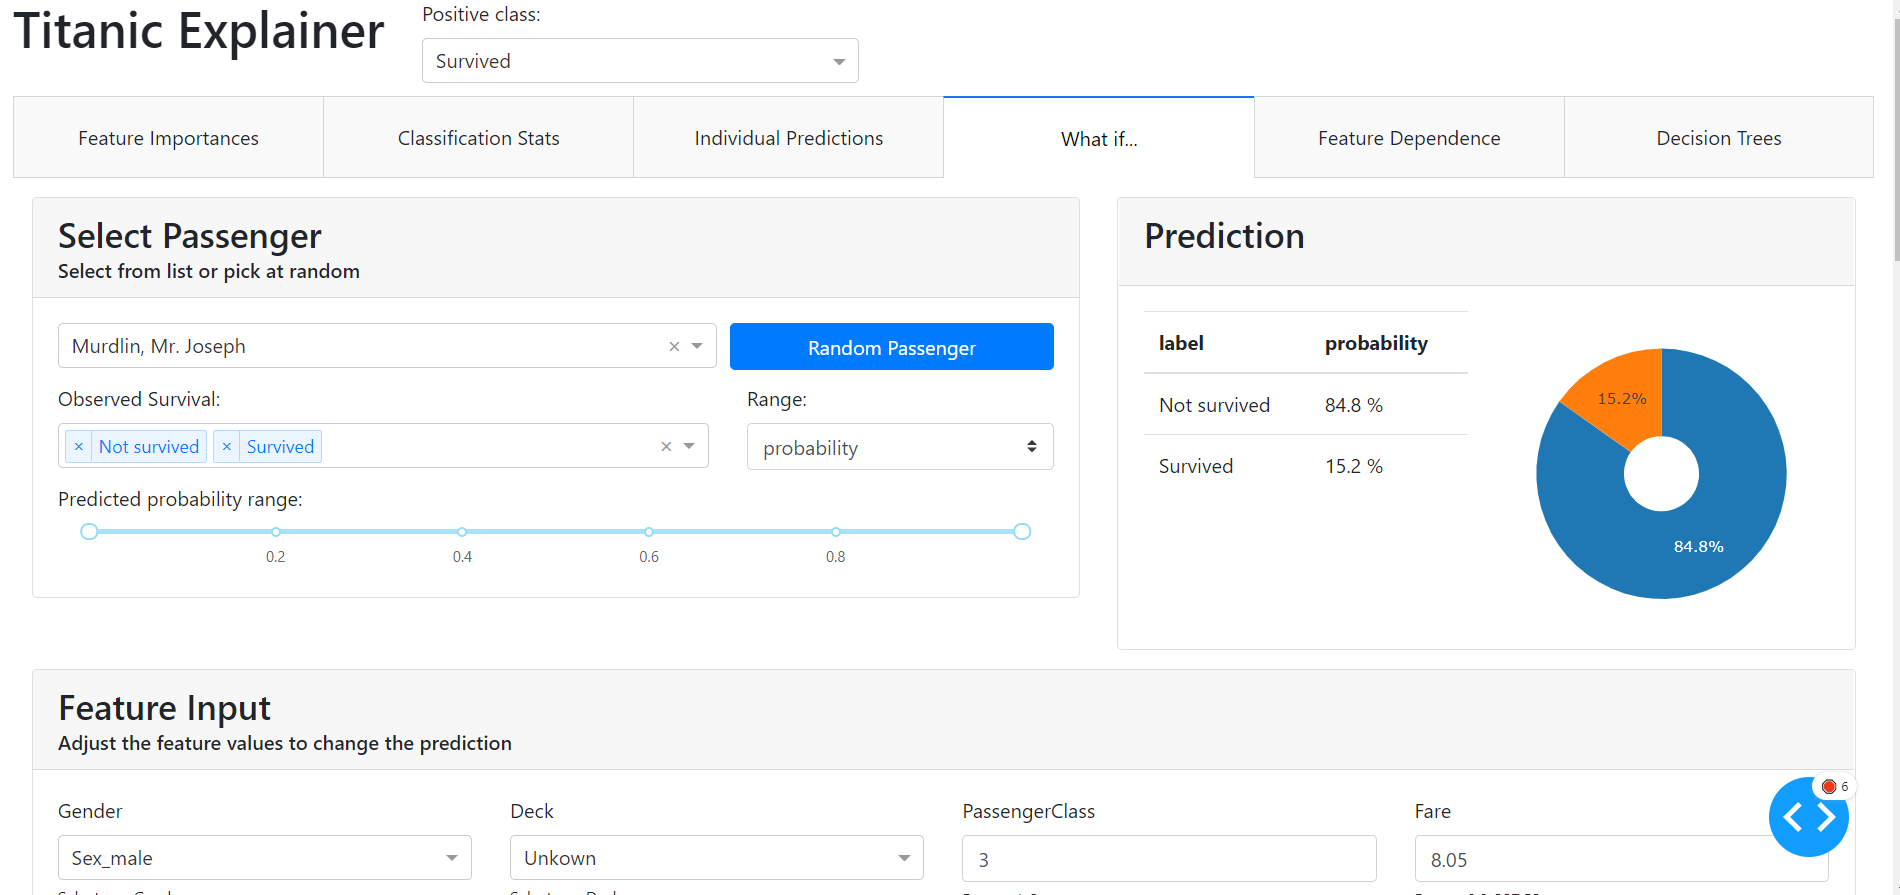

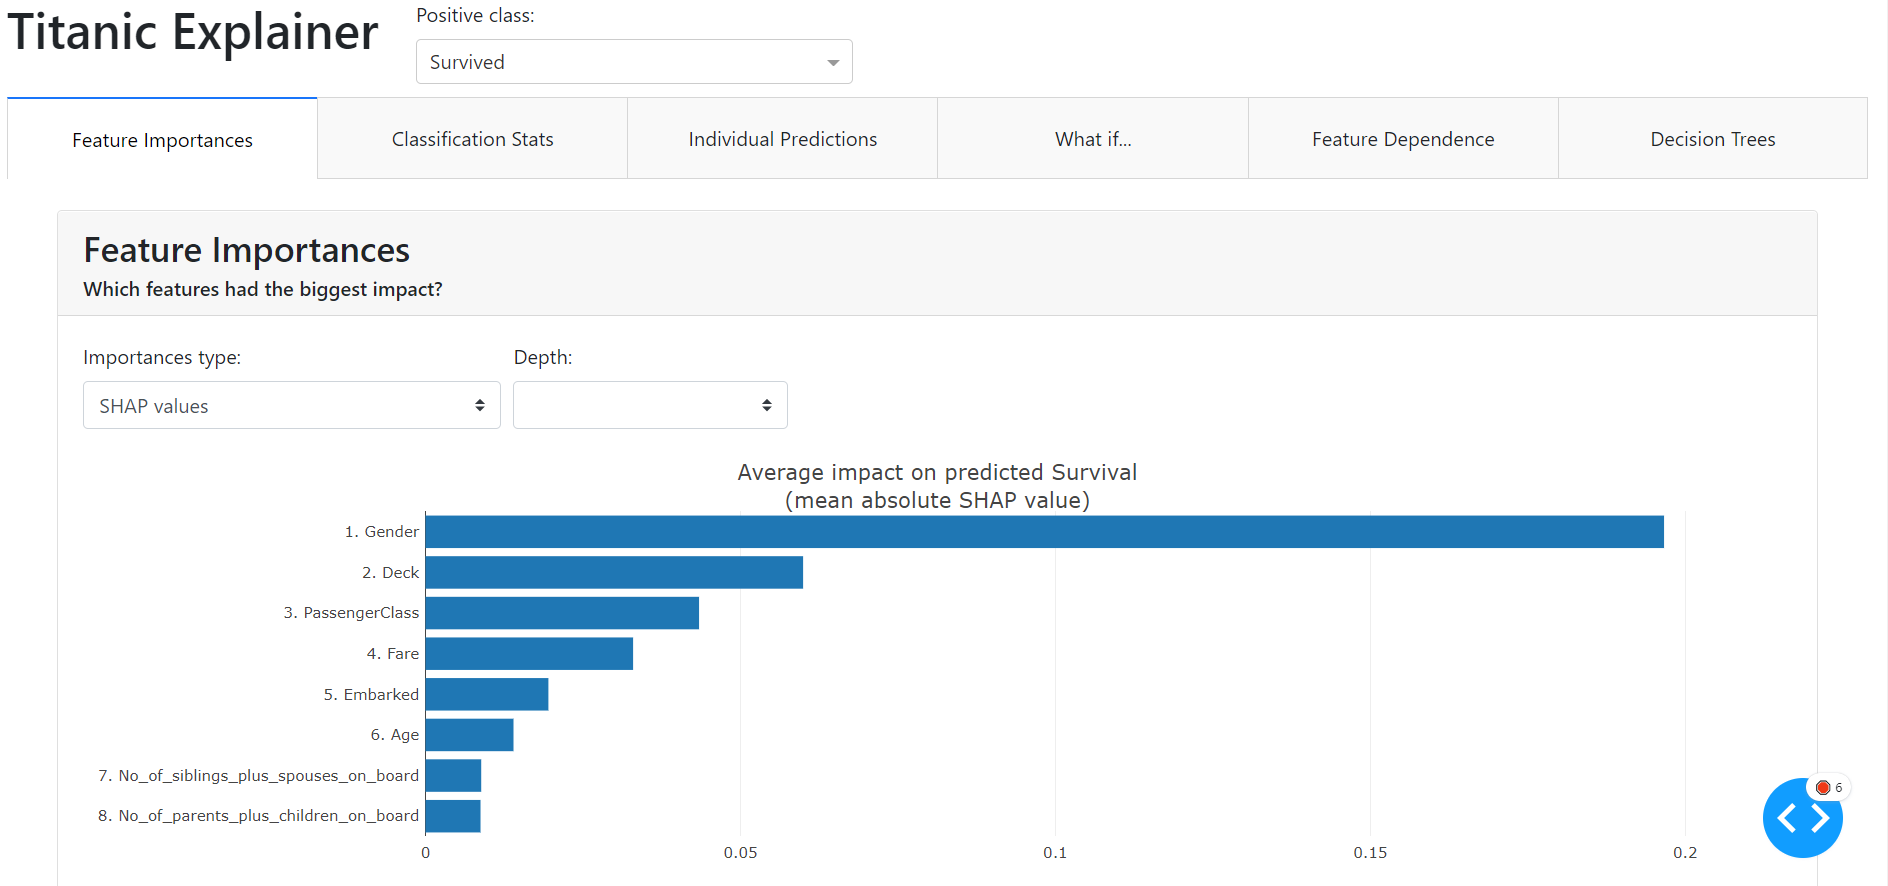